In [7]:
import pystan
import arviz
%matplotlib inline

The “eight schools” example appears in Section 5.5 of Gelman et al. (2003), which studied coaching effects from eight schools.

In [3]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [4]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


Once a model is compiled, we can use the StanModel object multiple times. This saves us time compiling the C++ code for the model. For example, if we want to sample more iterations, we proceed as follows:

In [12]:
fit = sm.sampling(data=schools_dat, iter=10000, chains=4)

The object fit, returned from function stan stores samples from the posterior distribution.

In [10]:
print(fit)

Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          7.39    0.23   5.42  -4.36   4.27   7.62  10.85  17.31    569   1.01
tau         6.52    0.22   5.52   0.24   2.38   5.27   9.12  21.04    651    1.0
eta[1]       0.4    0.02   0.98   -1.6  -0.26   0.45   1.06   2.29   1776    1.0
eta[2]      0.03    0.03    0.9  -1.71  -0.56   0.02   0.64   1.78   1299    1.0
eta[3]     -0.19    0.02   0.93  -2.05  -0.79   -0.2   0.43   1.65   1609    1.0
eta[4]   -5.3e-3    0.02   0.89  -1.84  -0.57 6.5e-3   0.55   1.75   1686    1.0
eta[5]     -0.31    0.02   0.89  -1.98  -0.92   -0.3   0.28    1.5   1592    1.0
eta[6]     -0.15    0.02   0.87  -1.88  -0.71  -0.16   0.37   1.59   1936    1.0
eta[7]      0.34    0.02   0.89  -1.52  -0.22   0.36   0.93   2.06   1461    1.0
eta

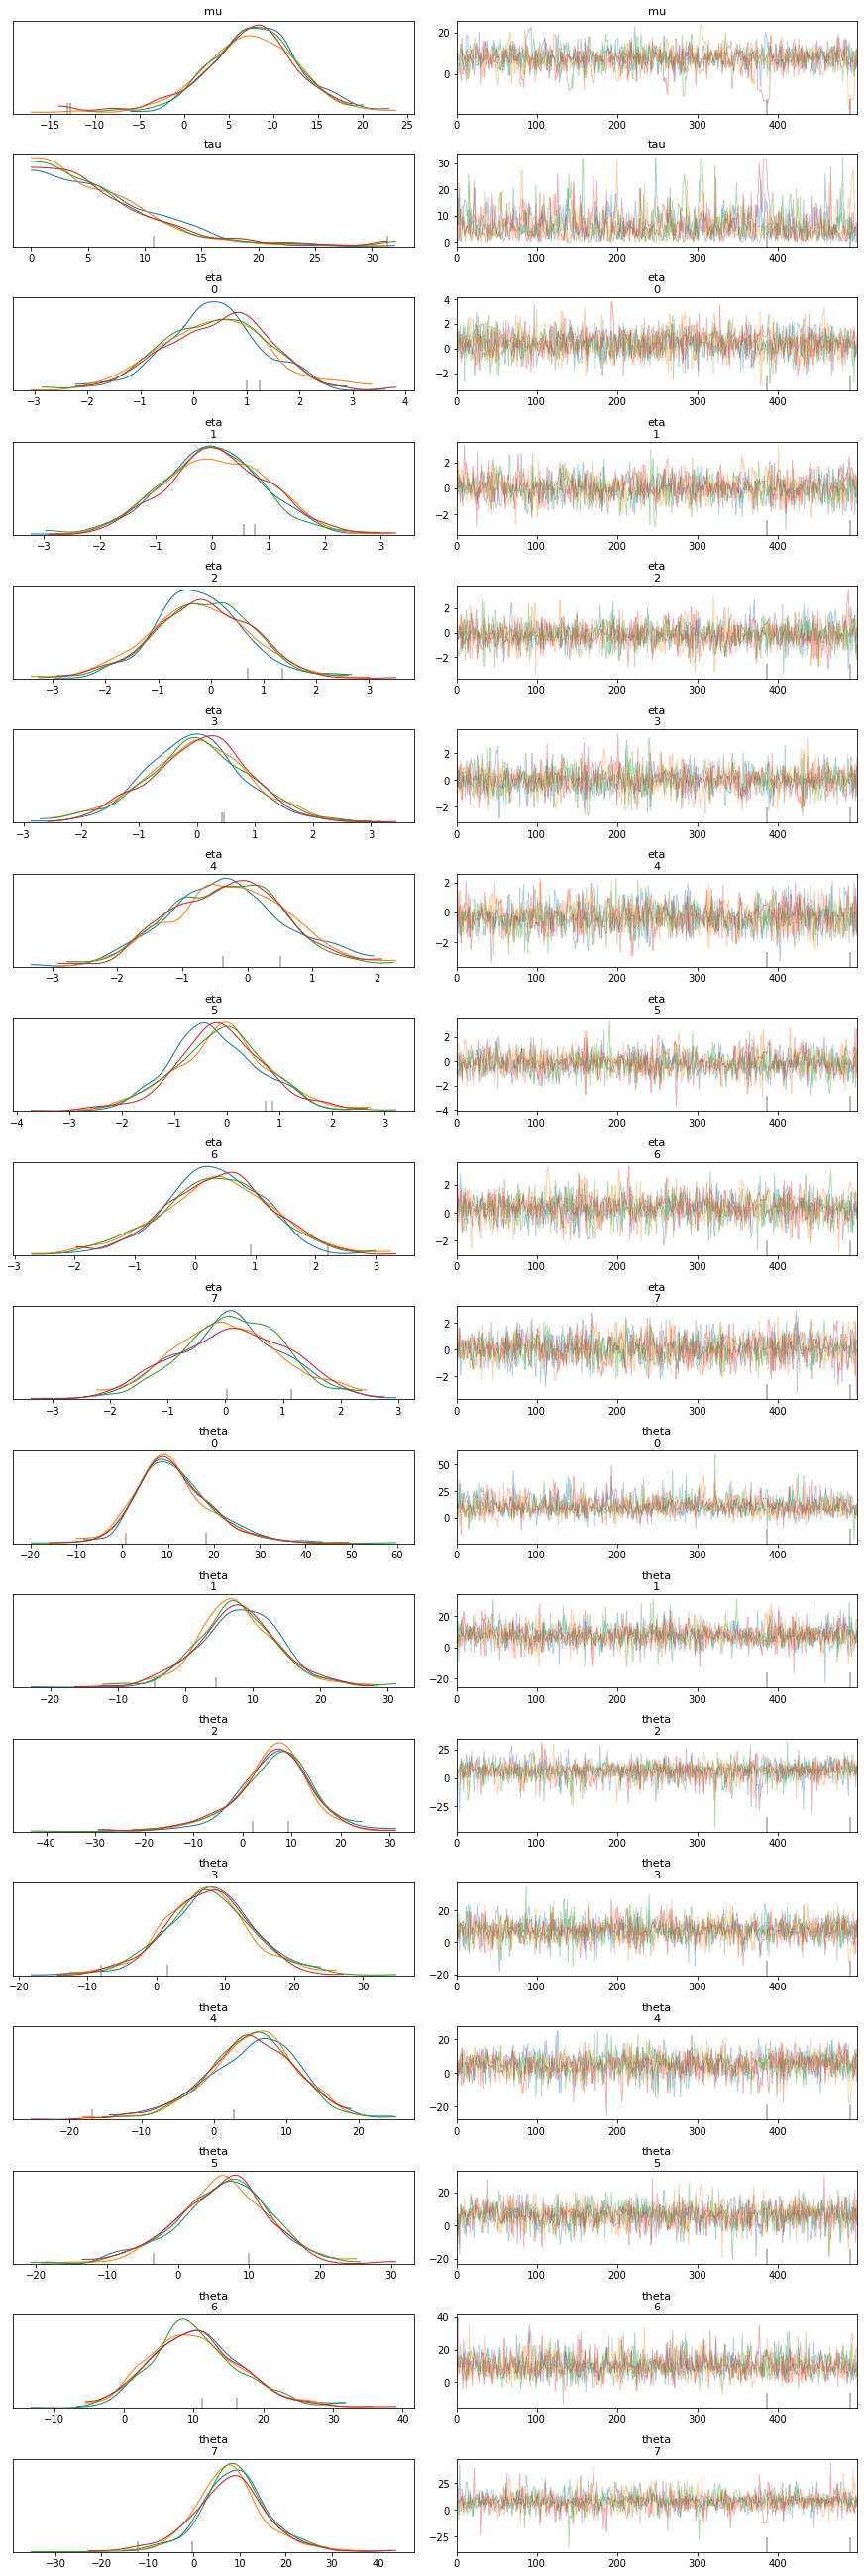

In [9]:
_ = arviz.plot_trace(fit)